#### import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
orders = pd.read_csv("C:\\My projects\\pandas\\quality_data\\orders_q")
orderlines = pd.read_csv("C:\\My projects\\pandas\\quality_data\\orderlines_q") 
products = pd.read_csv("C:\\My projects\\pandas\\quality_data\\products_q")
brands = pd.read_csv("C:\\My projects\\pandas\\quality_data\\brands_q")

In [5]:
orders.head()

,order_id,total_paid,state,month,year
0,241423,136.15,Completed,November,2017
1,242832,15.76,Completed,December,2017
2,243330,84.98,Completed,February,2017
3,245275,149.00,Completed,June,2017
4,245595,112.97,Completed,January,2017


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    61383 non-null  int64  
 1   total_paid  61383 non-null  float64
 2   state       61383 non-null  object 
 3   month       61383 non-null  object 
 4   year        61383 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [9]:
orderlines.head()

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77
2,243330,1,OWC0074,77.99
3,245275,1,TAD0007,149.00
4,245595,2,PAC1561,52.99


In [11]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          61383 non-null  int64  
 1   product_quantity  61383 non-null  int64  
 2   sku               61383 non-null  object 
 3   unit_price        61383 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ MB


In [13]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397
1,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,17.99,109.904,0,11905404
2,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac MacBook and MacBook Pro ...,99.99,999.896,1,1364
3,TAD0007,Tado Smart Climate Control Intelligent AC,intelligent control air conditioning works wit...,179.00,1489.994,0,11905404
4,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",Aluminum External Hard Drive 1TB capacity form...,103.95,59.584,1,11935397


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          61383 non-null  object 
 1   name         61383 non-null  object 
 2   desc         61383 non-null  object 
 3   price        61383 non-null  float64
 4   promo_price  61383 non-null  float64
 5   in_stock     61383 non-null  int64  
 6   type         61383 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [17]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [19]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


**1: How should products be classified into different categories to simplify reports and analysis?**

**2: What is the distribution of product prices across different categories?**

**3: How many products are being discounted?**

**4: How big are the offered discounts as a percentage of the product prices?**

**5: How do seasonality and special dates (Christmas, Black Friday) affect sales?**

**6: How could data collection be improved?**

#### Answering question 1:

**There are three different approaches to classify our data:**

1: **Based on the type of products** (*for example, monitors, laptops, etc.*) 

2: **Based on brand name** 

3: **Based on prices** (*since our company is a high-tech company specializing in Apple accessories*)

####   Based on the type of products

*We know that `type` is a numerical code for product type. So let's check the unique value of this column*

In [7]:
products['type'].nunique()

122

*I want to use this column to make category*

In [23]:
products['type'].value_counts().nlargest(20)

type
11865403    4601
11935397    4151
1364        3525
11905404    3435
5384        2413
12585395    2178
12215397    2166
12655397    1930
1296        1640
1230        1485
1231        1376
1405        1321
12175397    1282
1325        1209
13835403    1119
13855401     936
12755395     919
13555403     903
42945397     888
13615399     861
Name: count, dtype: int64

In [9]:
sample = products['type'].value_counts().nlargest(20).sum()
total = products['type'].value_counts().sum()
print(f'{round((sample * 100) / total)}% of products are in the top 20 types')

62% of products are in the top 20 types


In [11]:
sample = products['type'].value_counts().nlargest(40).sum()
total = products['type'].value_counts().sum()
print(f'{round((sample * 100) / total)}% of products are in the top 40 types')

85% of products are in the top 40 types


In [13]:
sample = products['type'].value_counts().nlargest(55).sum()
total = products['type'].value_counts().sum()
print(f'{round((sample * 100) / total)}% of products are in the top 55 types')

93% of products are in the top 55 types


*I think if we categorize the top 55 types of products, we can cover 91% of all products, which is good.*

*I spent lots of time and check columns `name`, `desc`, `type` to find categories*

*First of all I create an dictionary*

In [15]:
category = {
    '11865403' : 'case cover',
    '12175397' : 'server , keyboard',
    '1298': 'accessories',
    '11935397': 'hard drive',
    '11905404' : 'accessories',
    '1282' : 'macbook , imack',
    '12635403' : 'ipad case , ipad cover , stand',
    '13835403' : 'macbook case , macbook cover',
    '5,74E+15' : 'apple imac',
    '1364' : 'mac memory, ram',
    '12585395' : 'cable , adapter , usb',
    '1296' : 'monitor',
    '1325' : 'cable',
    '5384' : 'headset, airpods, headphones',
    '1433' : 'ram',
    '12215397' : 'hard drive',
    '5398' : 'speaker',
    '1,02E+12' : 'macbook',
    '1,44E+11' : 'repair service',
    '57445397' : 'usb',
    '1334' : 'wireless',
    '2158' : 'macbook',
    '2449' : 'apple watch',
    '12655397' : 'hard drive',
    '1229' : 'digital pen',
    '12995397' : 'cable, adapter, notebook accessories, tablet accessories, mac accessories',
    '1515' : 'battry, charger',
    '13615399' : 'charger',
    '13555403' : 'glass',
    '1405' : 'graphic tablet',
    '1230' : 'cable',
    '118692158' : 'imac',
    '1216' : 'adapter, support, stand',
    '24885185' : 'apple watch',
    '24895185' : 'apple watch',
    '21485407' : 'battery, speaker, adapter, repair service',
    '1392' : 'bag, backpack',
    '11821715' : 'ipod touch',
    '8696' : 'supprot , stand',
    '9094' : 'battery, camera',
    '5,39E+11' : 'macbook',
    '42945397' : 'usb',
    '12645406' : 'repair service',
    '51601716' : 'iphone',
    '2,16E+11' : 'imac',
    '85651716' : 'iphone',
    '24215399' : 'stand, support',
    '5720' : 'stand, support, holder',
    '14305406' : 'repair service, notebook accessories, tablet accessories, mac accessories',
    '5405' : 'armband',
    '13005399' : 'charger',
    '21632158' : 'mac',
    '2,17E+11': 'macbook',
    '13855401' : 'keyboard'
}

*So, we created a dictionary where the keys are the values from the `type` column, and the values are the ones we defined.*

*Now, the question is:*
**How can we add this dictionary to our data as a new column?**

To do that, I want to use the `.map()` method. However, we need to base this operation on the `type` column, which means we want to fill the new column with the corresponding values from the dictionary based on the type column.

In [17]:
products['category'] = products['type'].astype(str).map(category)

A question:

**Which one is better?**

    products['category'] = products['type'].map(category)
    products['category'] = products['type'].astype(str).map(category)


Second approach ensures type consistency between the `type` column and the dictionary keys, avoiding potential issues. 

It’s particularly helpful when working with data that might not always be clean or standardized.

In [35]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type,category
0,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
1,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,17.99,109.904,0,11905404,accessories
2,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac MacBook and MacBook Pro ...,99.99,999.896,1,1364,"mac memory, ram"
3,TAD0007,Tado Smart Climate Control Intelligent AC,intelligent control air conditioning works wit...,179.00,1489.994,0,11905404,accessories
4,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",Aluminum External Hard Drive 1TB capacity form...,103.95,59.584,1,11935397,hard drive


In [37]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          61383 non-null  object 
 1   name         61383 non-null  object 
 2   desc         61383 non-null  object 
 3   price        61383 non-null  float64
 4   promo_price  61383 non-null  float64
 5   in_stock     61383 non-null  int64  
 6   type         61383 non-null  object 
 7   category     51553 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


*We know that we categorized just 91% of all products, but what about the remaining 9%?*

*For the remaining data, I want to use the fillna() method and assign the category "other" to them.*

In [19]:
products.fillna('other', inplace = True)

In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          61383 non-null  object 
 1   name         61383 non-null  object 
 2   desc         61383 non-null  object 
 3   price        61383 non-null  float64
 4   promo_price  61383 non-null  float64
 5   in_stock     61383 non-null  int64  
 6   type         61383 non-null  object 
 7   category     61383 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


**2: What is the distribution of product prices across different categories?**

*Let's check the distribution*

In [21]:
dist = products.groupby('category').size().reset_index(name='quantity')
dist = dist.sort_values(by = 'quantity' , ascending = False).head(10)

A quastion:
What is difference between these two way?:

    dist = products.groupby('category').size().reset_index(name='quantity')
    dist = products.groupby('category').count()

The original `products.groupby('category').count()` will result in a DataFrame with the same columns as products, where each column holds the counts.

Instead, use `.size()` to count rows per category and reset the index to convert the results into a **plottable DataFrame**.

Then we can rename the `count column` to `'quantity'`.

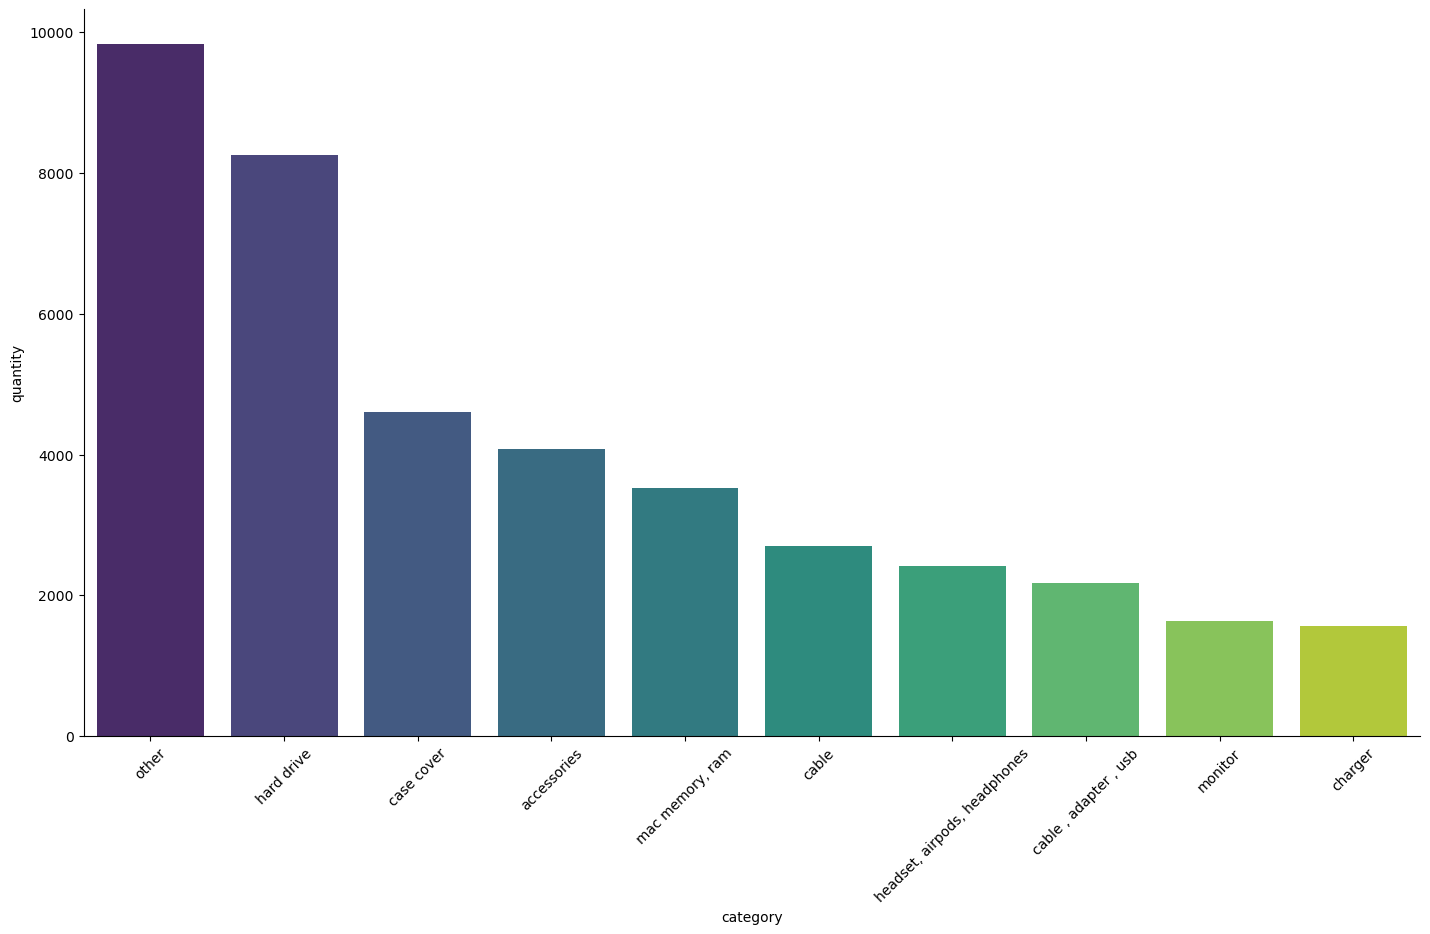

In [23]:
sns.catplot(data=dist,
            kind='bar',
            x='category',
            y='quantity',
            hue='category',
            palette='viridis',
            height= 8, 
            aspect=1.8,
            legend=False)
plt.xticks(rotation=45) 
plt.show()

**3: How many products are being discounted?**

Before starting the analysis, let’s establish a couple of things:

Analyzing discounts means looking at which products have been sold. We remember that this information is stored in the `orderlines table`.

Discounts are defined as the difference between `orderlines.unit_price` and `products.price`.

We want to merge both tables and creating a column that contains the discount.

In [51]:
orderlines.head(2)

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77


In [53]:
products.head(2)

,sku,name,desc,price,promo_price,in_stock,type,category
0,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
1,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,17.99,109.904,0,11905404,accessories


In [27]:
discount_check = orderlines.merge(products,
                            on = 'sku',
                            how = 'inner')

In [414]:
discount_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850279 entries, 0 to 4850278
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_order          int64  
 1   product_quantity  int64  
 2   sku               object 
 3   unit_price        float64
 4   name              object 
 5   desc              object 
 6   price             float64
 7   promo_price       float64
 8   in_stock          int64  
 9   type              object 
 10  category          object 
dtypes: float64(3), int64(3), object(5)
memory usage: 407.1+ MB


In [19]:
discount_check.shape

(4850279, 11)

In [418]:
discount_check.head()

,id_order,product_quantity,sku,unit_price,name,desc,price,promo_price,in_stock,type,category
0,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
1,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
2,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
3,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
4,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive


In [29]:
with_discount = round(((discount_check.loc[discount_check['price'] > discount_check['unit_price'],:].shape[0]) *100) / discount_check.shape[0])

In [422]:
print(f'{with_discount}% of products include a discount')

95% of products include a discount


In [31]:
without_discount = round((((discount_check.loc[discount_check['price'] <= discount_check['unit_price'],:].shape[0]) *100) / discount_check.shape[0]), 0)

In [426]:
print(f'{without_discount}% of products without any discount')

5.0% of products without any discount


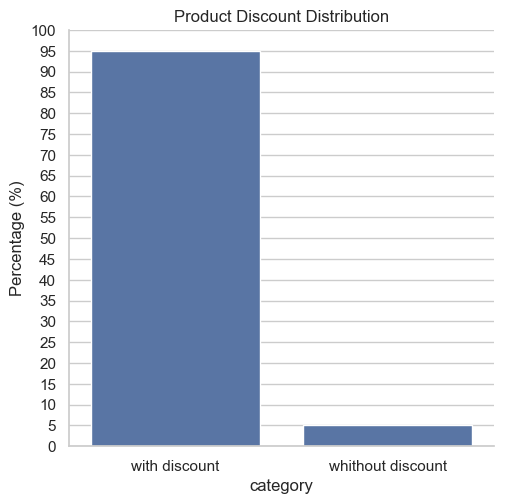

In [33]:
data = {'category' : ['with discount' , 'whithout discount'],
        'percentage' : [with_discount , without_discount]}
df = pd.DataFrame(data)


sns.set(style="whitegrid")

sns.catplot(kind = 'bar',
            data = df,
            x = 'category',
            y = 'percentage')

plt.title('Product Discount Distribution')
plt.ylabel('Percentage (%)')
plt.yticks(range(0, int(df['percentage'].max()) + 10, 5))
plt.show()

4- How big are the offered discounts as a percentage of the product prices?

In [35]:
discount_mask = discount_check['price'] > discount_check['unit_price']

In [37]:
discount_check = discount_check.loc[discount_mask, :]

In [434]:
discount_check.shape

(4610657, 11)

In [436]:
discount_check.head(2)

,id_order,product_quantity,sku,unit_price,name,desc,price,promo_price,in_stock,type,category
0,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
1,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive


In [438]:
discount_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610657 entries, 0 to 4850278
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_order          int64  
 1   product_quantity  int64  
 2   sku               object 
 3   unit_price        float64
 4   name              object 
 5   desc              object 
 6   price             float64
 7   promo_price       float64
 8   in_stock          int64  
 9   type              object 
 10  category          object 
dtypes: float64(3), int64(3), object(5)
memory usage: 422.1+ MB


In [39]:
discount_check.loc[:, 'discount%'] = round(((discount_check['price'] - discount_check['unit_price']) * 100) / (discount_check['price']),0)

In [442]:
discount_check.head(2)

,id_order,product_quantity,sku,unit_price,name,desc,price,promo_price,in_stock,type,category,discount%
0,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive,8.0
1,241423,1,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive,8.0


In [41]:
discount_check.loc[: , ['price', 'unit_price','discount%']].sort_values(by = 'discount%' , ascending = False).head()

,price,unit_price,discount%
1138968,5028.034,53.99,99.0
4785989,35998.952,359.99,99.0
4551117,69.950,1.60,98.0
4551118,69.950,1.60,98.0
4551141,69.950,1.60,98.0


*I want to check how many products include a discount of more than 80%*

In [45]:
mask80 = discount_check['discount%'] > 80

In [47]:
discount_80 = round(((discount_check.loc[mask80 ,:].shape[0] * 100 ) / discount_check.shape[0]), 0)

In [49]:
print(f' roughly {discount_80}% of discounted products include more than 80% discount')

 roughly 1.0% of discounted products include more than 80% discount


*I want to check how many products include a discount of more than 50%*

In [51]:
mask50 = discount_check['discount%'] > 50

In [53]:
discount_50 = round(((discount_check.loc[mask50 ,:].shape[0] * 100 ) / discount_check.shape[0]), 0)

In [55]:
print(f' roughly {discount_50}% of discounted products include more than 50% discount')

 roughly 14.0% of discounted products include more than 50% discount


*I want to check how many products include a discount of more than 40%*

In [57]:
mask40 = discount_check['discount%'] > 40

In [59]:
discount_40 = round(((discount_check.loc[mask40 ,:].shape[0] * 100 ) / discount_check.shape[0]), 0)

In [61]:
print(f' roughly {discount_40}% of discounted products include more than 40% discount')

 roughly 18.0% of discounted products include more than 40% discount


*I want to check how many products include a discount of more than 30%*

In [63]:
mask30 = discount_check['discount%'] > 30

In [65]:
discount_30 = round(((discount_check.loc[mask30 ,:].shape[0] * 100 ) / discount_check.shape[0]), 0)

In [67]:
print(f' roughly {discount_30}% of discounted products include more than 30% discount')

 roughly 23.0% of discounted products include more than 30% discount


*I want to check how many products include a discount of more than 20%*

In [69]:
mask20 = discount_check['discount%'] > 20

In [71]:
discount_20 = round(((discount_check.loc[mask20 ,:].shape[0] * 100 ) / discount_check.shape[0]), 0)

In [73]:
print(f' roughly {discount_20}% of discounted products include more than 20% discount')

 roughly 48.0% of discounted products include more than 20% discount


*Now, I want to visualize them*

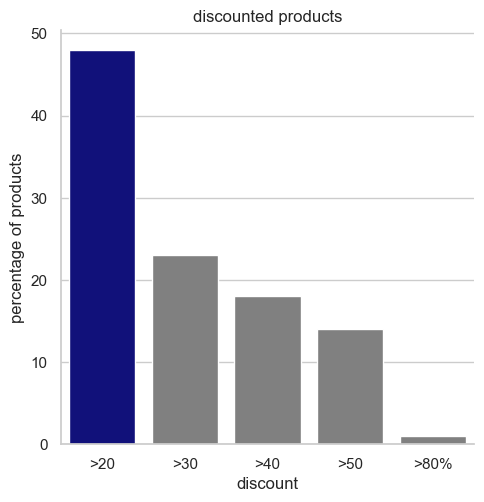

In [75]:
# first Way:

data = {'discount': ['>80%' , '>50' , '>40', '>30' , '>20'],
        'amount': [discount_80, discount_50, discount_40, discount_30, discount_20]}
df = pd.DataFrame(data)
df= df.sort_values(by = 'amount', ascending = False)

palette = ['darkblue', 'grey' , 'grey', 'grey', 'grey']

sns.set(style = 'whitegrid')
sns.catplot(data = df,
            kind = 'bar',
            x = 'discount',
            y = 'amount',
            hue = 'discount',
            palette  = palette )
plt.title('discounted products')
plt.ylabel('percentage of products')
plt.show()

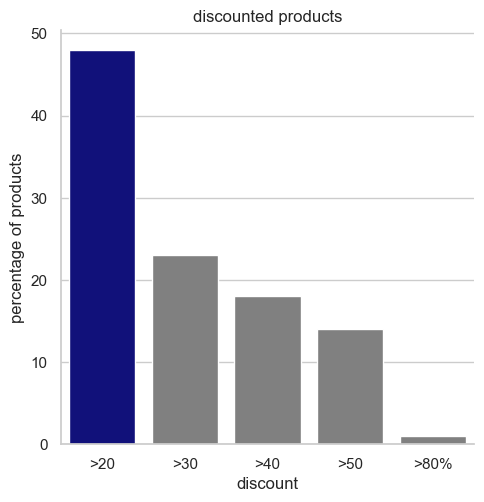

In [77]:
# Second way:

data = {'discount': ['>80%' , '>50' , '>40', '>30' , '>20'],
        'amount': [discount_80, discount_50, discount_40, discount_30, discount_20]}
df = pd.DataFrame(data)
df= df.sort_values(by = 'amount', ascending = False)

palette = ['darkblue' if i == 0 else 'grey' for  i in range(len(df))]

sns.set(style = 'whitegrid')
sns.catplot(data = df,
            kind = 'bar',
            x = 'discount',
            y = 'amount',
            hue = 'discount',
            palette  = palette )
plt.title('discounted products')
plt.ylabel('percentage of products')
plt.show()

*As we can see, roughly of products include more than 20% discount*

**5: How do seasonality and special dates (Christmas, Black Friday) affect sales?**

In [633]:
orders.head(3)

,order_id,total_paid,state,month,year
0,241423,136.15,Completed,November,2017
1,242832,15.76,Completed,December,2017
2,243330,84.98,Completed,February,2017


In [639]:
orderlines.head(3)

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77
2,243330,1,OWC0074,77.99


In [79]:
season_check = orders.merge(orderlines,
                            left_on = 'order_id',
                            right_on = 'id_order',
                            how = 'inner')

In [647]:
season_check.head(2)

,order_id,total_paid,state,month,year,id_order,product_quantity,sku,unit_price
0,241423,136.15,Completed,November,2017,241423,1,LAC0212,129.16
1,242832,15.76,Completed,December,2017,242832,1,PAR0074,10.77


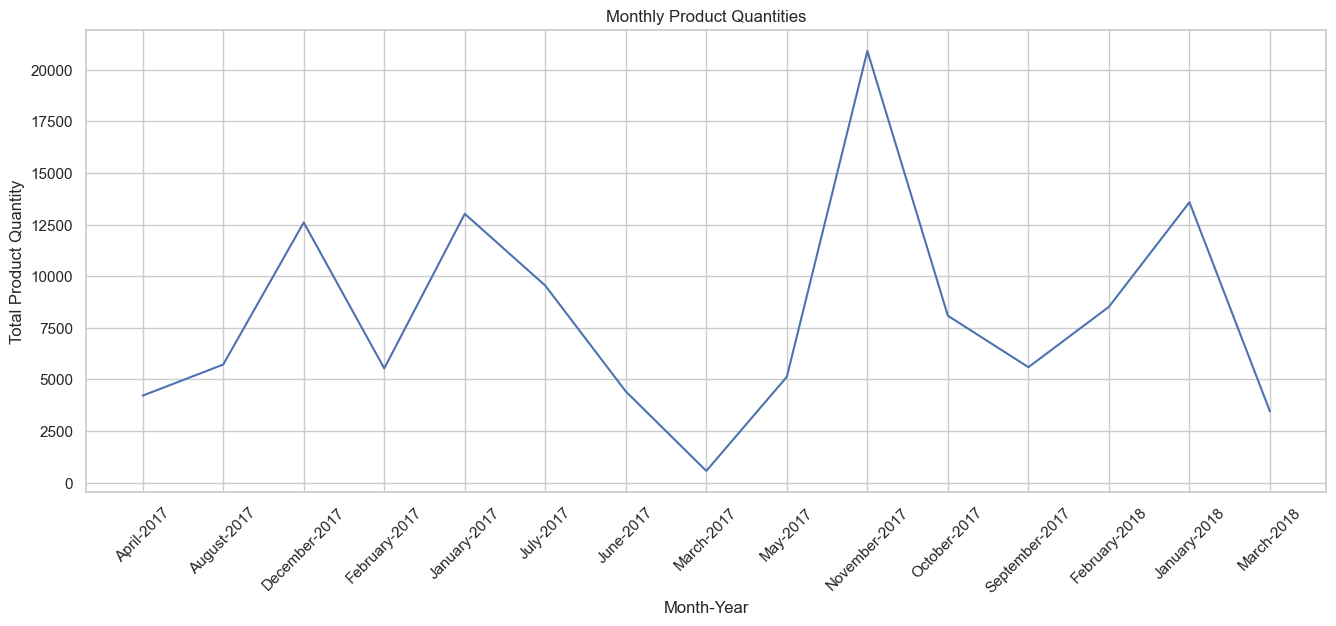

In [81]:
data = season_check.groupby(['month', 'year'])['product_quantity'].sum().reset_index().sort_values(by = 'year')

plt.figure(figsize=(16, 6))


sns.lineplot(
    data=data,
    x = data.apply(lambda row: f"{row['month']}-{row['year']}", axis=1),
    y = 'product_quantity'
)

plt.xlabel("Month-Year")  
plt.ylabel("Total Product Quantity")  
plt.title("Monthly Product Quantities")  
plt.xticks(rotation=45) 
plt.show()


*I want to check our investment over time.*

In [88]:
orderlines.head(2)

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77


In [94]:
orders.head(2)

,order_id,total_paid,state,month,year
0,241423,136.15,Completed,November,2017
1,242832,15.76,Completed,December,2017


In [102]:
investment_check = orderlines.merge(orders,
                              left_on = 'id_order',
                              right_on = 'order_id',
                              how = 'inner')
investnent_check = investment_check.drop(columns = ['id_order', 'sku', 'total_paid', 'state'] , inplace = True)
investment_check.head(2)

,product_quantity,unit_price,order_id,month,year
0,1,129.16,241423,November,2017
1,1,10.77,242832,December,2017


In [104]:
investment_check.loc[: , 'total_investment']  = investment_check['product_quantity']*investment_check['unit_price']

In [106]:
investment_check.head(2)

,product_quantity,unit_price,order_id,month,year,total_investment
0,1,129.16,241423,November,2017,129.16
1,1,10.77,242832,December,2017,10.77


*Now I want to visualize it*

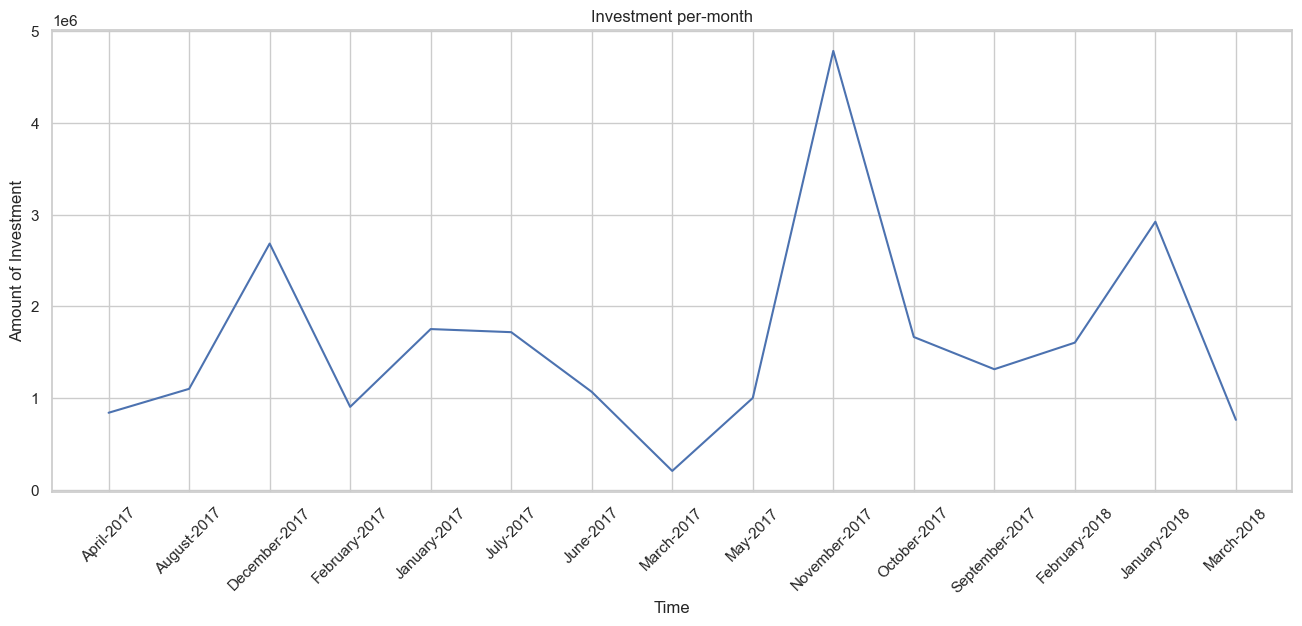

In [139]:
data = investment_check.groupby(['month' , 'year']).agg({'total_investment' : 'sum'}).reset_index().sort_values(by = 'year')

plt.figure(figsize = (16, 6))
sns.lineplot(data = data,
             x = data.apply(lambda row: f"{row['month']}-{row['year']}", axis=1),
             y = 'total_investment')
plt.title('Investment per-month')
plt.ylabel('Amount of Investment')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.show()

*Let's check total discounts VS. investments per-month*

In [153]:
orders.head(2)

,order_id,total_paid,state,month,year
0,241423,136.15,Completed,November,2017
1,242832,15.76,Completed,December,2017


In [155]:
orderlines.head(2)

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77


In [157]:
products.head(2)

,sku,name,desc,price,promo_price,in_stock,type,category
0,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,1149.948,1,11935397,hard drive
1,PAR0074,Parrot 550mAh battery for MiniDrones,550mAh rechargeable battery for Parrot minidrones,17.99,109.904,0,11905404,accessories


In [163]:
disc = orders.merge(orderlines,
                    left_on = 'order_id',
                    right_on = 'id_order',
                    how = 'inner')
discount_investment = disc.merge(products,
                                 on = 'sku',
                                 how = 'inner')
discount_investment = discount_investment.loc[:, ['product_quantity', 'unit_price', 'price', 'month' , 'year']]

In [165]:
discount_investment.head(2)

,product_quantity,unit_price,price,month,year
0,1,129.16,139.99,November,2017
1,1,129.16,139.99,November,2017


In [167]:
discount_investment.loc[:, 'discount'] = discount_investment['price'] - discount_investment['unit_price']
discount_investment.loc[:, 'investment'] = discount_investment['unit_price'] * discount_investment['product_quantity']
discount_investment.drop(columns = ['product_quantity', 'unit_price', 'price'], inplace = True) 

In [169]:
discount_investment.head(2)

,month,year,discount,investment
0,November,2017,10.83,129.16
1,November,2017,10.83,129.16


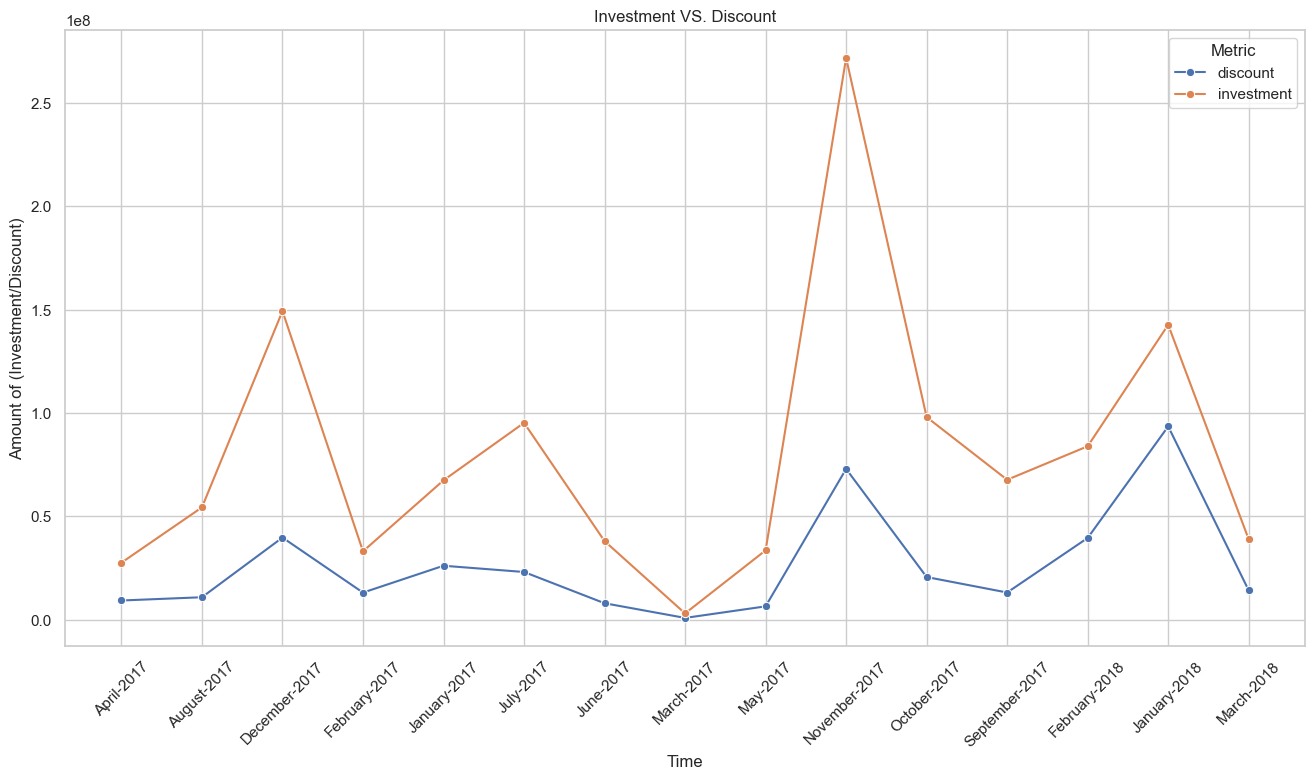

In [287]:
data = discount_investment.groupby(['month','year']).agg({'discount': 'sum', 'investment':'sum'}).reset_index().sort_values(by = 'year')

plt.figure(figsize = (16,8))

sns.lineplot(data = data,
             x = data.apply(lambda row: f'{row['month']}-{row['year']}', axis =1),
             y = 'discount',
             marker = 'o',
             label = 'discount')
sns.lineplot(data = data,
             x = data.apply(lambda row: f'{row['month']}-{row['year']}', axis = 1),
             y = 'investment',
             marker = 'o',
             label = 'investment')

plt.title('Investment VS. Discount')
plt.ylabel('Amount of (Investment/Discount)')
plt.xlabel('Time')
plt.xticks(rotation = 45)
plt.legend(title = 'Metric')
plt.show()

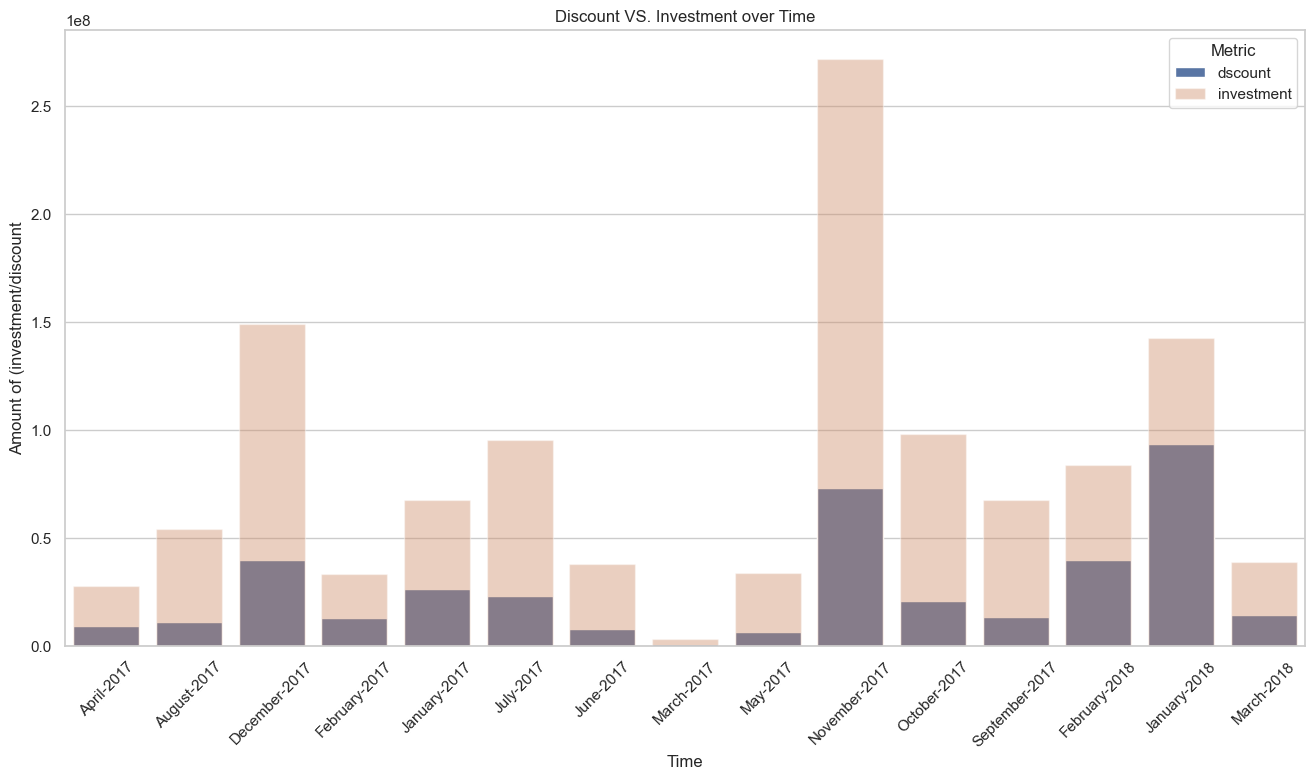

In [289]:
plt.figure(figsize = (16,8))
sns.barplot(data = data,
            x = data.apply(lambda row: f"{row['month']}-{row['year']}", axis =1),
            y = 'discount',
            label = 'dscount')
sns.barplot(data = data,
            x = data.apply(lambda row: f"{row['month']}-{row['year']}", axis =1),
            y = 'investment',
            label = 'investment',
            alpha = 0.4)
plt.title('Discount VS. Investment over Time')
plt.xlabel('Time')
plt.ylabel('Amount of (investment/discount')
plt.legend(title = "Metric")
plt.xticks(rotation = 45)
plt.show()

*Let's check which category gives us more investment and examine its discount*

In [291]:
df1 = orders.merge(orderlines,
                    left_on = 'order_id',
                    right_on = 'id_order',
                    how = 'inner')
df2 = df1.merge(products,
                on = 'sku',
                how = 'inner')
cat_check = df2 .loc[:, ['category','product_quantity', 'unit_price', 'price']]

In [293]:
cat_check.loc[:, 'discount'] = cat_check['price'] - cat_check['unit_price']
cat_check.loc[:, 'investment'] = cat_check['unit_price'] * cat_check['product_quantity']
cat_check.drop(columns = ['product_quantity', 'unit_price', 'price'], inplace = True) 

In [281]:
cat_check.head(2)

,category,discount,investment
0,hard drive,10.83,129.16
1,hard drive,10.83,129.16


In [307]:
data = cat_check.groupby('category').agg({'discount':'sum', 'investment':'sum'}).reset_index().sort_values(by = 'investment' , ascending = False).head(10)

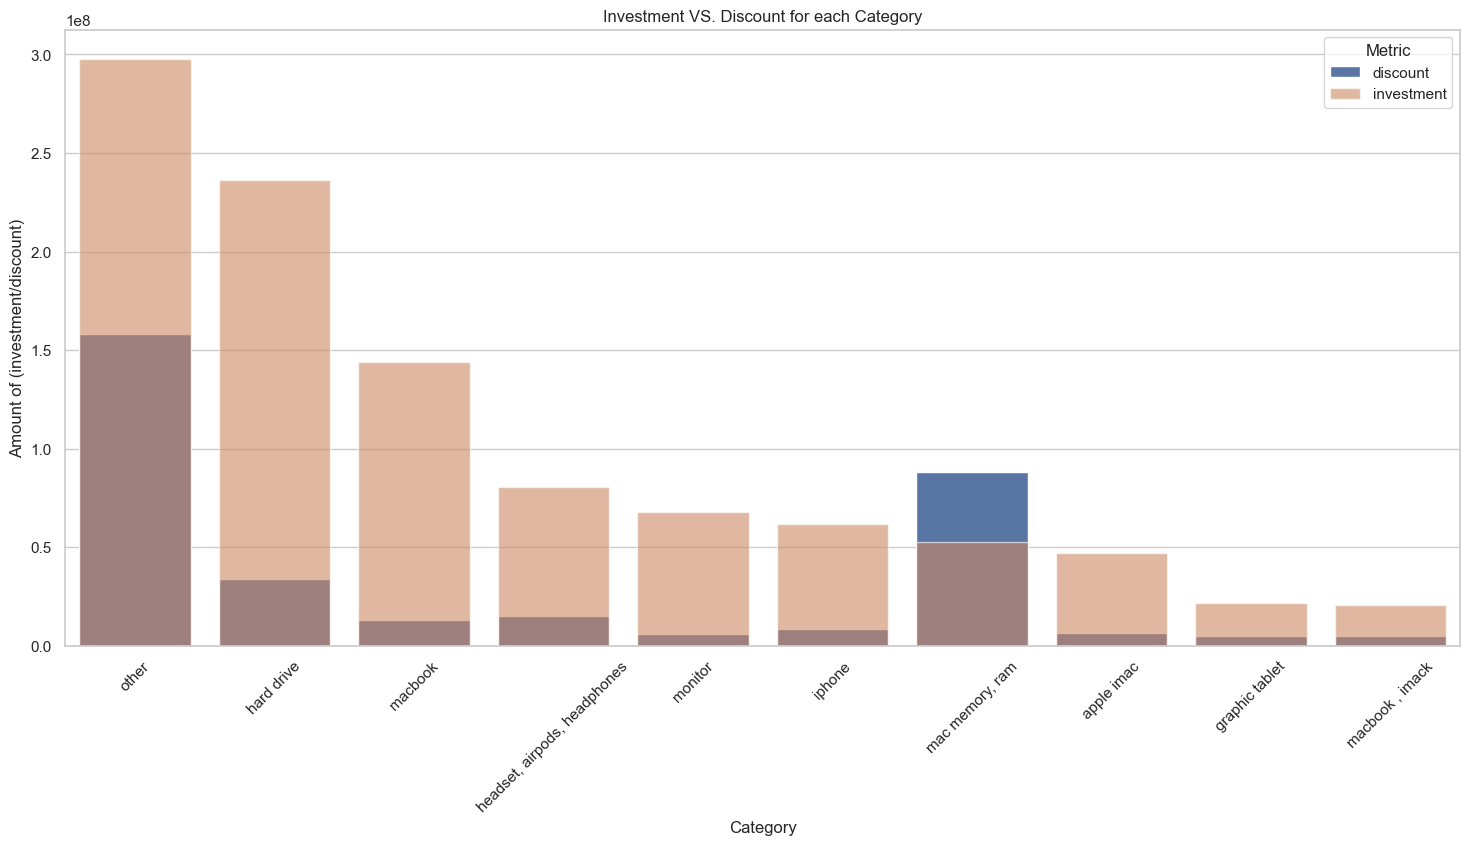

In [309]:
plt.figure(figsize = (18,8))

sns.barplot(data = data,
            x = 'category',
            y = 'discount',
            label = 'discount')
sns.barplot(data = data,
            x = 'category',
            y = 'investment',
            label = 'investment',
           alpha = 0.6)
plt.title('Investment VS. Discount for each Category')
plt.xlabel('Category')
plt.ylabel('Amount of (investment/discount)')
plt.legend(title = "Metric")
plt.xticks(rotation = 45)
plt.show()

#### Conclusion:


The data supports both sides of the argument but suggests we should be cautious:

   * Discounts help attract more customers and boost activity, especially during periods like Black Friday.

   * However, the sharp increase in investment compared to discounts shows that our current approach may not be sustainable in the long term.

We need to strike a balance between offering discounts and managing costs to ensure long-term profitability.

And finally, aggressive discounts may not be the best approach.

  *  While discounts do attract customers and increase activity, the spike in investment costs suggests diminishing returns.
  *  Aggressive discounting could hurt profitability, especially if revenue doesn't grow proportionally to cover the increased costs.
    
Instead of aggressive discounts, we could focus on targeted discounts during key events like Black Friday or for specific products, while positioning the company as a provider of quality products. This approach can maintain customer interest without compromising long-term profitability.